In [67]:
from numpy import sum, array
from pandas import DataFrame, Series, read_csv
from matplotlib.pyplot import figure, show, subplots, savefig, setp
from matplotlib.figure import Figure
from matplotlib.gridspec import GridSpec
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by, set_chart_labels, plot_multiline_chart




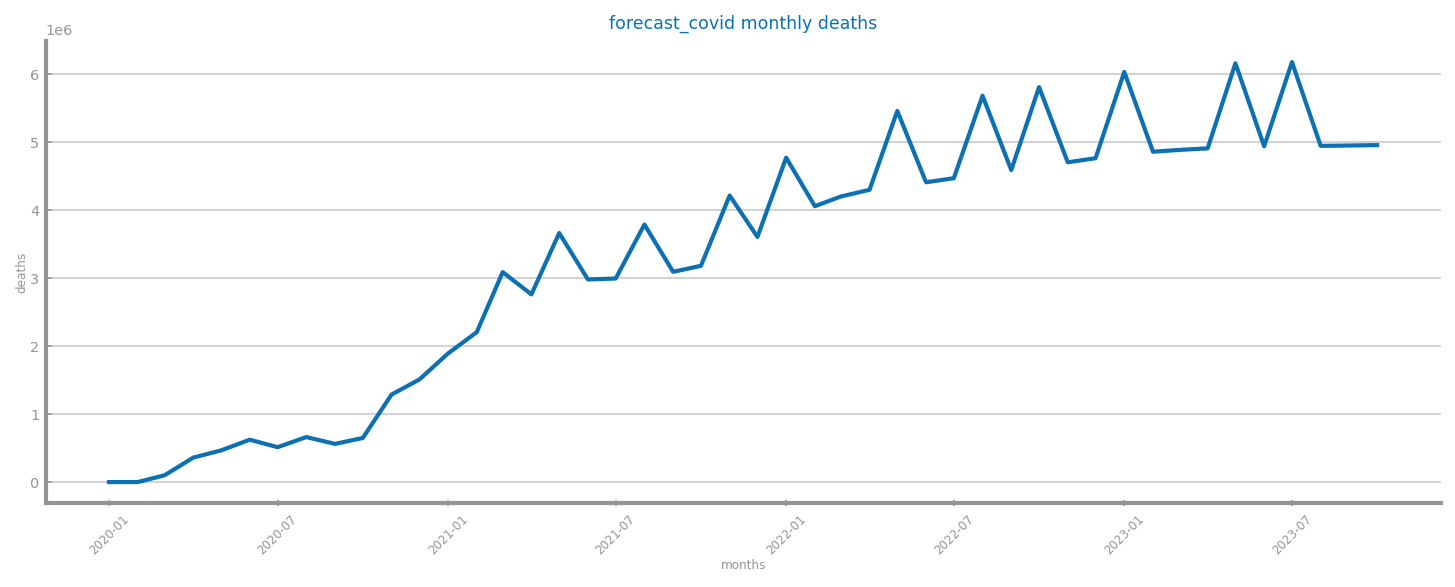

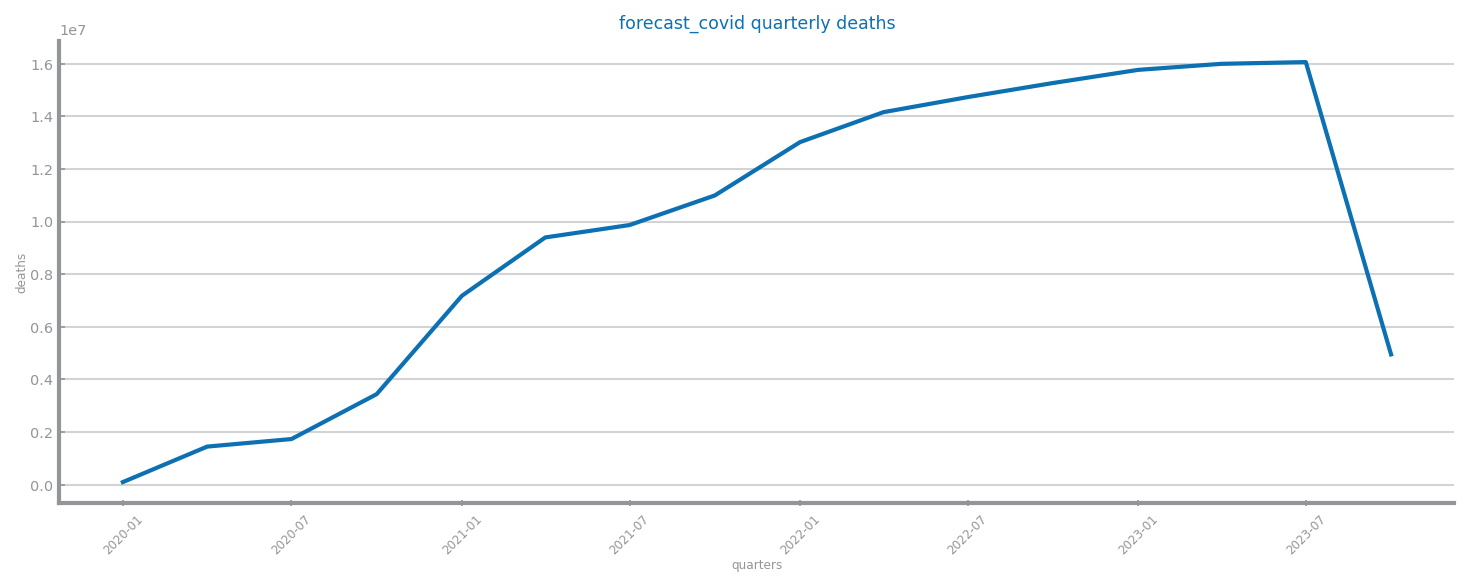

In [68]:
file_tag = "forecast_covid"
filename = "datasets/forecast_covid_single.csv"
index = "date"
target = "deaths"
data: DataFrame = read_csv(
    filename,
    index_col=index,
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]
ss_months: Series = ts_aggregation_by(series, gran_level="M", agg_func=sum)

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_months.index.to_list(),
    ss_months.to_list(),
    xlabel="months",
    ylabel=target,
    title=f"{file_tag} monthly {target}",
)
show()

ss_quarters: Series = ts_aggregation_by(series, gran_level="Q", agg_func=sum)

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_quarters.index.to_list(),
    ss_quarters.to_list(),
    xlabel="quarters",
    ylabel=target,
    title=f"{file_tag} quarterly {target}",
)
show()

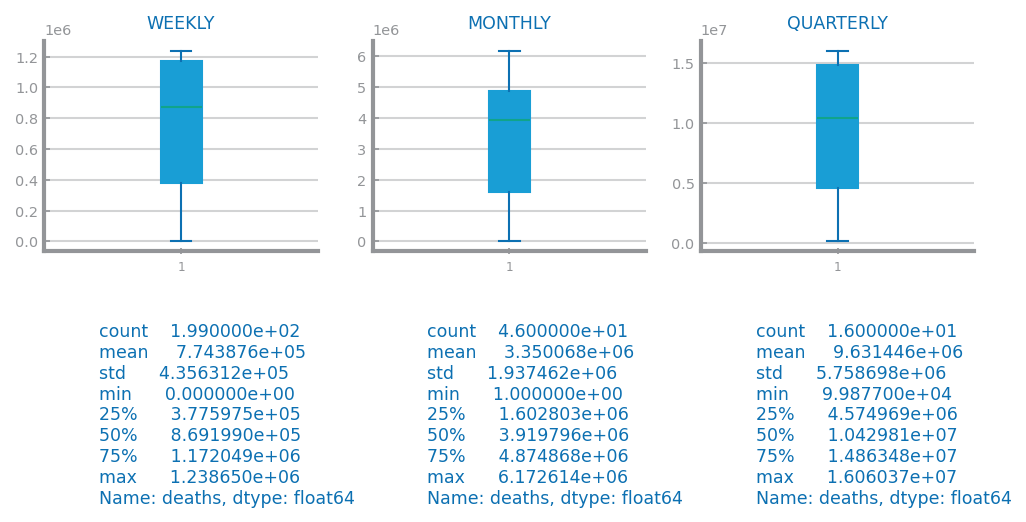

In [69]:
fig: Figure
axs: array
fig, axs = subplots(2, 3, figsize=(2 * HEIGHT, HEIGHT))
set_chart_labels(axs[0, 0], title="WEEKLY")
axs[0, 0].boxplot(series)
set_chart_labels(axs[0, 1], title="MONTHLY")
axs[0, 1].boxplot(ss_months)
set_chart_labels(axs[0, 2], title="QUARTERLY")
axs[0, 2].boxplot(ss_quarters)

axs[1, 0].grid(False)
axs[1, 0].set_axis_off()
axs[1, 0].text(0.2, 0, str(series.describe()), fontsize="small")

axs[1, 1].grid(False)
axs[1, 1].set_axis_off()
axs[1, 1].text(0.2, 0, str(ss_months.describe()), fontsize="small")

axs[1, 2].grid(False)
axs[1, 2].set_axis_off()
axs[1, 2].text(0.2, 0, str(ss_quarters.describe()), fontsize="small")

savefig(f"images/forecast/{file_tag}_data_analysis_distribution_boxplots", bbox_inches="tight")
show()

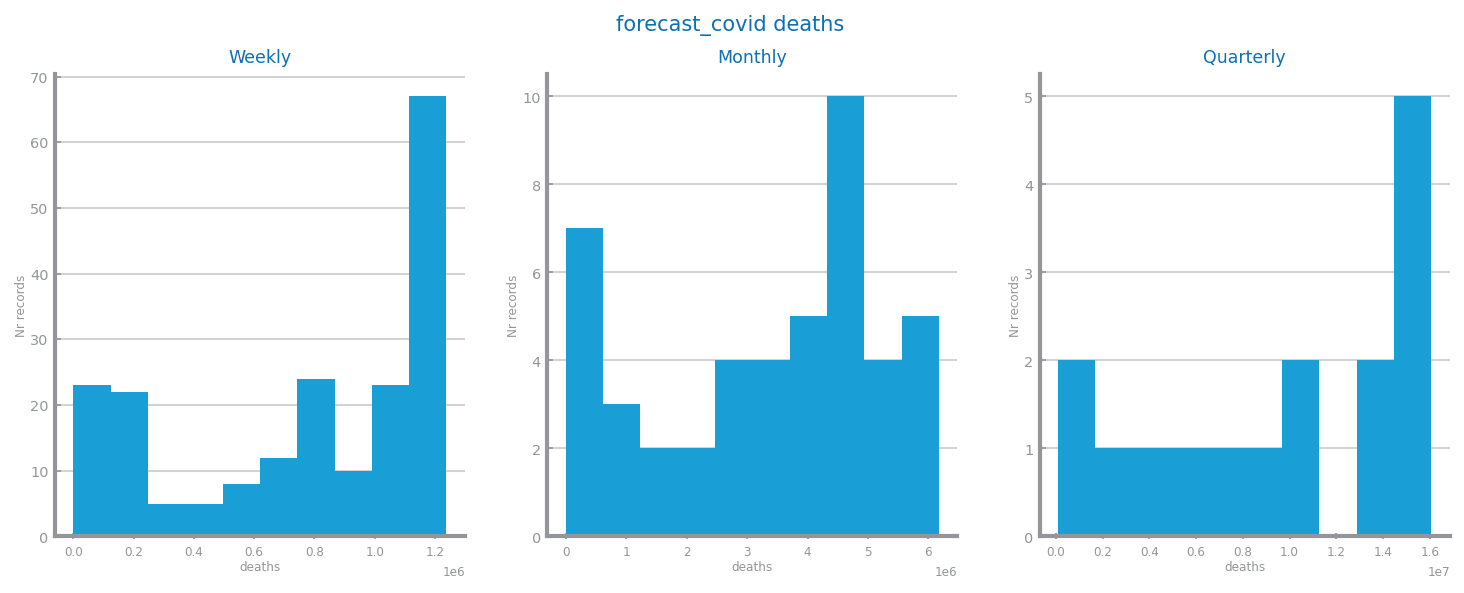

In [70]:
grans: list[Series] = [series, ss_months, ss_quarters]
gran_names: list[str] = ["Weekly", "Monthly", "Quarterly"]
fig: Figure
axs: array
fig, axs = subplots(1, len(grans), figsize=(len(grans) * HEIGHT, HEIGHT))
fig.suptitle(f"{file_tag} {target}")
for i in range(len(grans)):
    set_chart_labels(axs[i], title=f"{gran_names[i]}", xlabel=target, ylabel="Nr records")
    axs[i].hist(grans[i].values)

savefig(f"images/forecast/{file_tag}_data_analysis_distribution_histograms", bbox_inches="tight")
show()

In [71]:
def get_lagged_series(series: Series, max_lag: int, delta: int = 1):
    lagged_series: dict = {"original": series, "lag 1": series.shift(1)}
    for i in range(delta, max_lag + 1, delta):
        lagged_series[f"lag {i}"] = series.shift(i)
    return lagged_series

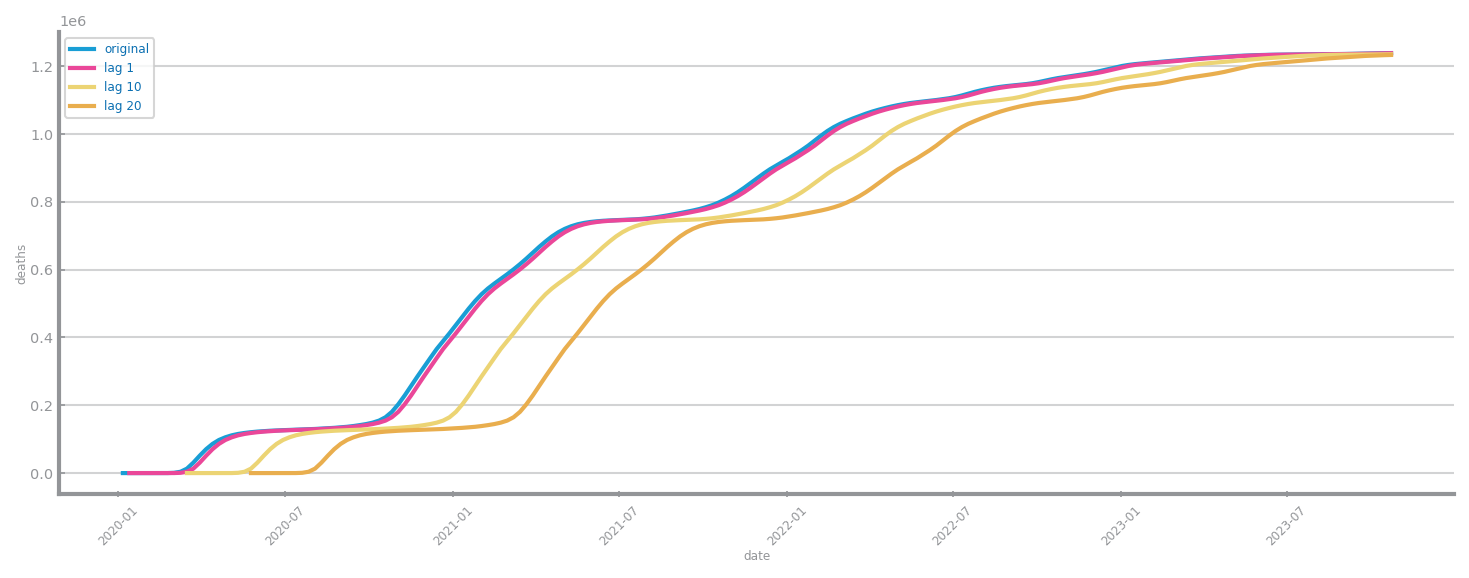

In [72]:

figure(figsize=(3 * HEIGHT, HEIGHT))
lags = get_lagged_series(series, 20, 10)
plot_multiline_chart(series.index.to_list(), lags, xlabel=index, ylabel=target)


savefig(f"images/forecast/{file_tag}_data_analysis_distribution_autocorrelation_lag_plots", bbox_inches="tight")
show()

In [73]:
def autocorrelation_study(series: Series, max_lag: int, delta: int = 1):
    k: int = int(max_lag / delta)
    fig = figure(figsize=(4 * HEIGHT, 2 * HEIGHT), constrained_layout=True)
    gs = GridSpec(2, k, figure=fig)

    series_values: list = series.tolist()
    for i in range(1, k + 1):
        ax = fig.add_subplot(gs[0, i - 1])
        lag = i * delta
        ax.scatter(series.shift(lag).tolist(), series_values)
        ax.set_xlabel(f"lag {lag}")
        ax.set_ylabel("original")
    ax = fig.add_subplot(gs[1, :])
    ax.acorr(series, maxlags=max_lag)
    ax.set_title("Autocorrelation")
    ax.set_xlabel("Lags")
    return


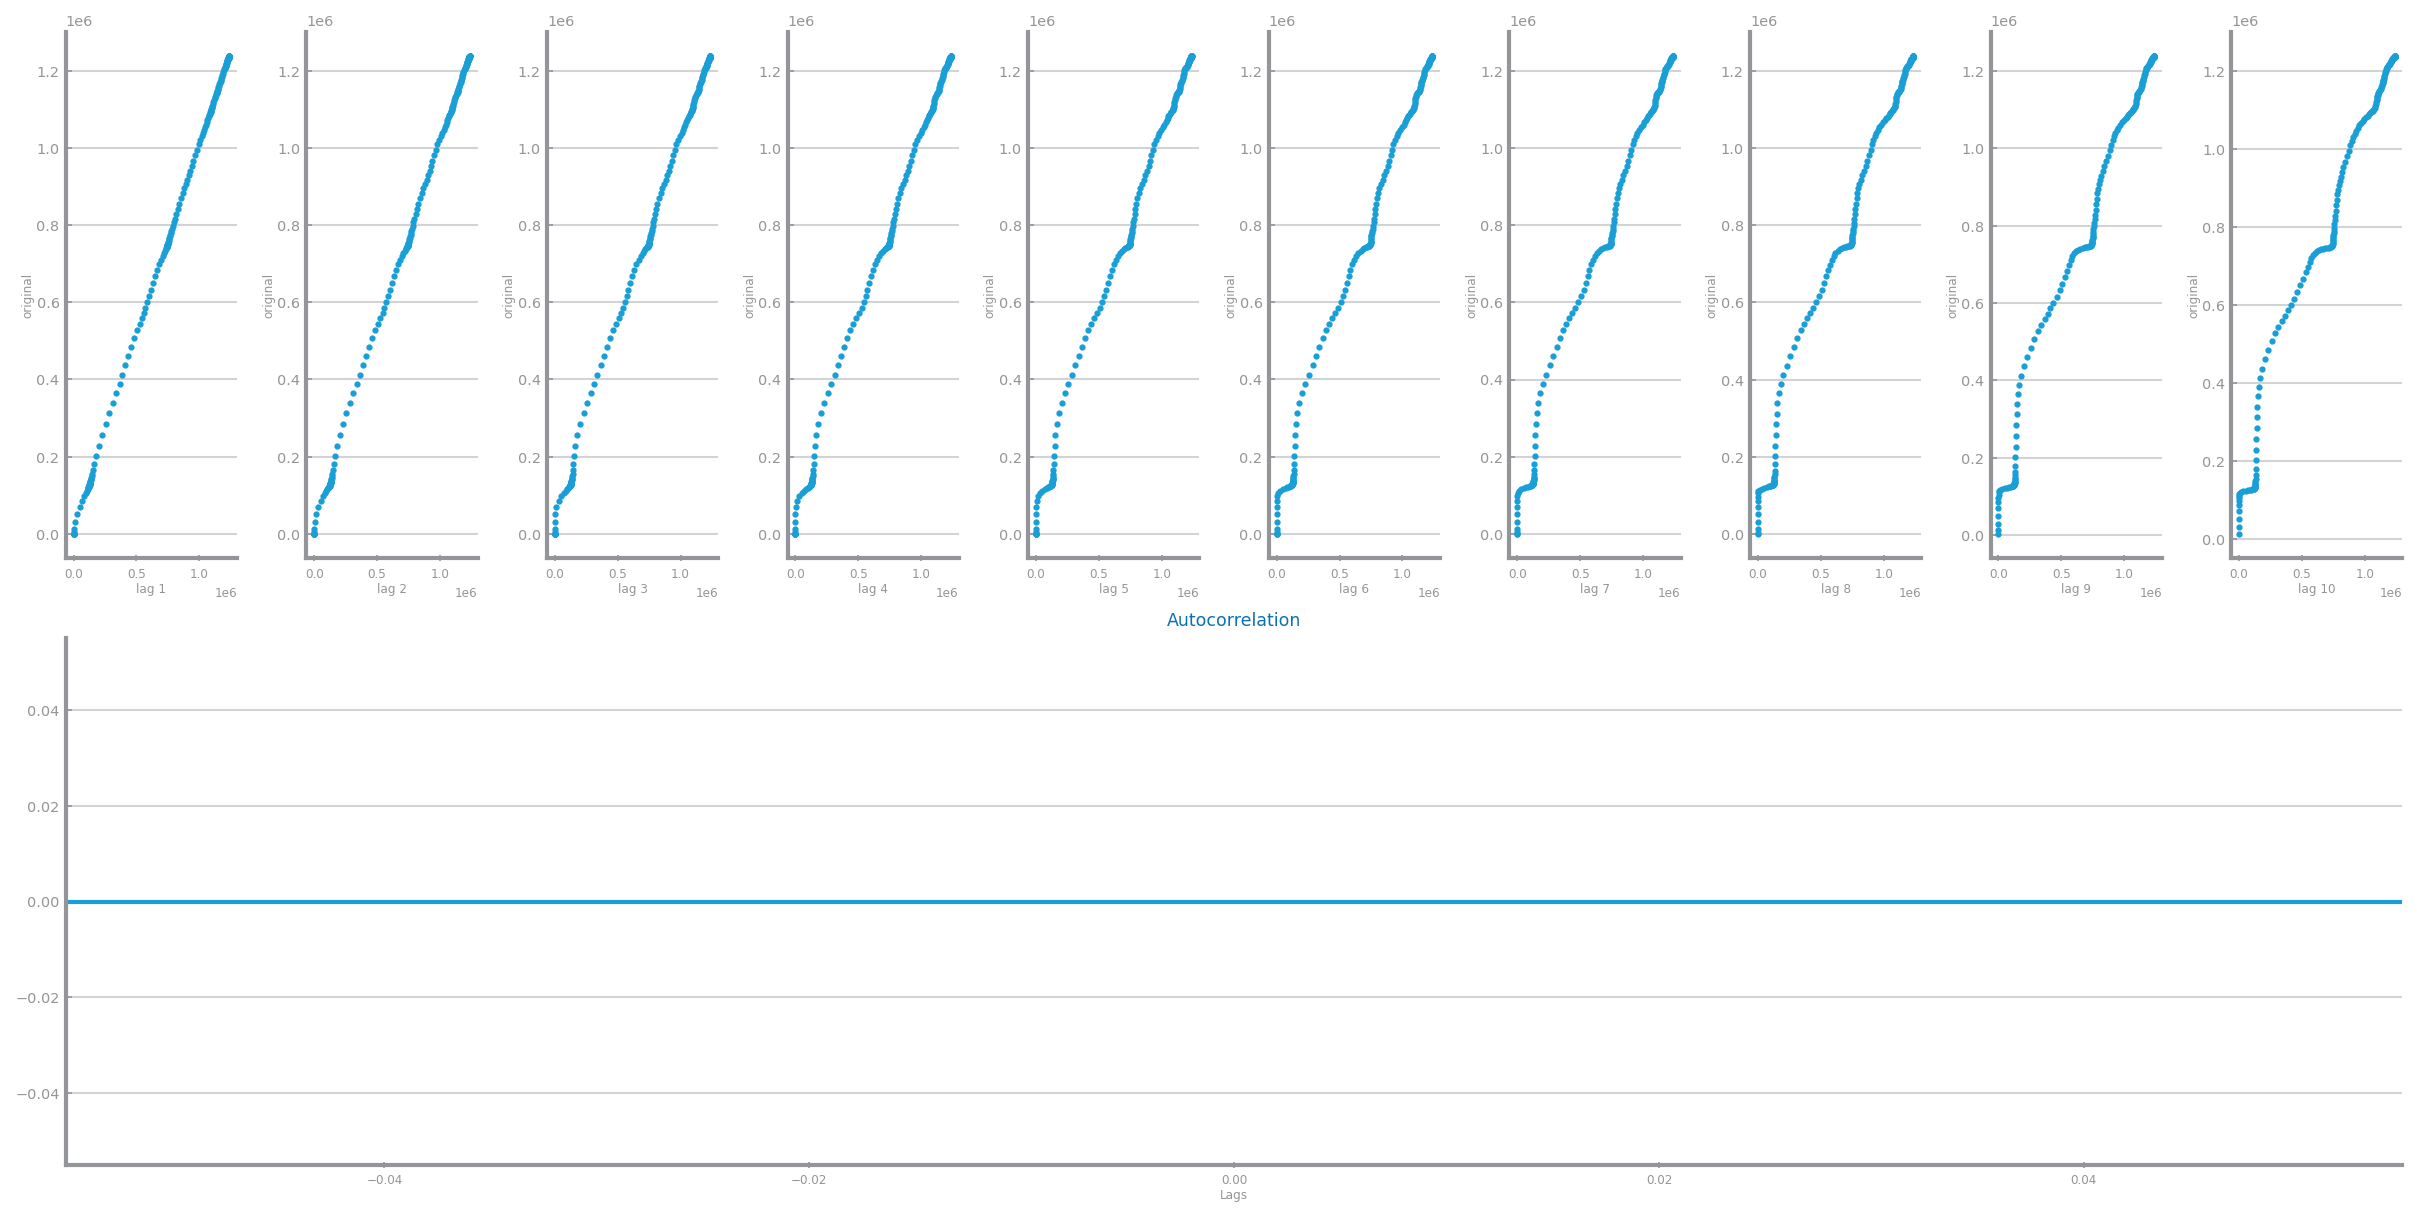

In [74]:
autocorrelation_study(series, 10, 1)

savefig(f"images/forecast/{file_tag}_data_analysis_distribution_autocorrelation_correlogram", bbox_inches="tight")
show()